# Fun with activation functions

### Generate some data

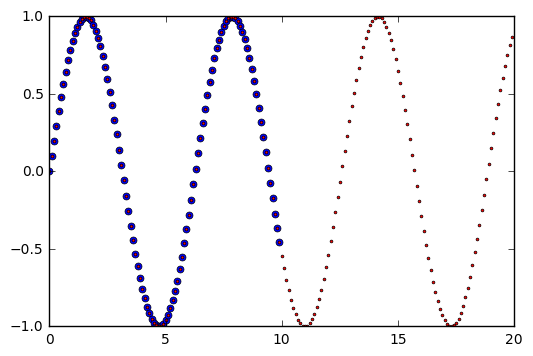

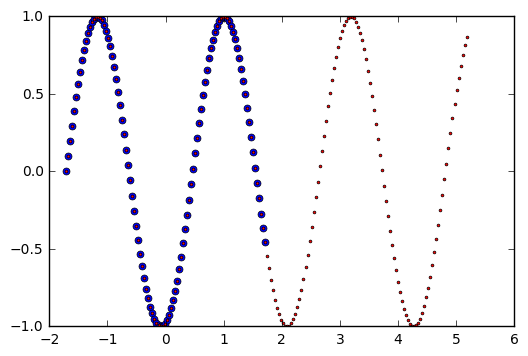

In [62]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

train_x=np.arange(0, 10, 0.1)
train_y=np.sin(train_x)

test_x=np.arange(0, 20, 0.1)
test_y=np.sin(test_x)

plt.plot(train_x,train_y,'bo',ms=5)
plt.plot(test_x, test_y,'ro', ms=2)
plt.show()

from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
train_x = standard_scaler.fit_transform(train_x.reshape(-1,1))
test_x = standard_scaler.transform(test_x.reshape(-1,1))

plt.plot(train_x,train_y,'bo',ms=5)
plt.plot(test_x, test_y,'ro', ms=2)
plt.show()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_22 (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
activation_fun1 (Dense)          (None, 6)             12          input_22[0][0]                   
____________________________________________________________________________________________________
activation_fun2 (Dense)          (None, 1)             7           activation_fun1[0][0]            
Total params: 19
____________________________________________________________________________________________________
('loss:', 0.17050659656524658, 'mae:', 0.28101637959480286)
('test loss:', 3.268583633005619, 'test mae:', 1.3082650899887085)


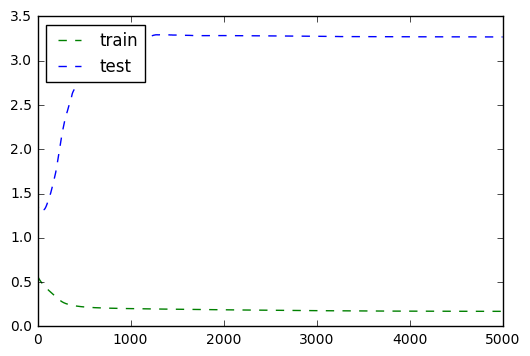

In [118]:
from keras.models import Model
from keras.layers import Input, Dense

input1 = Input(shape=(1,))
x = Dense(6, activation='relu', name='activation_fun1')(input1)   # change relu to tanh
predictions = Dense(1,activation='linear',name='activation_fun2')(x)

model_1 = Model(input=input1, output=predictions)

model_1.compile(loss='mse', optimizer ='adam', metrics=['mae'])
model_1.summary()

model_1.fit(train_x,train_y,batch_size=100, nb_epoch=5000, verbose=0,validation_data=(test_x, test_y))

plt.plot(model_1.history.epoch, model_1.history.history['loss'], 'g--',
         model_1.history.epoch, model_1.history.history['val_loss'], 'b--',)
plt.legend(['train', 'test'], loc='upper left')

print ("loss:",model_1.history.history['loss'][-1],"mae:",model_1.history.history['mean_absolute_error'][-1])
print ("test loss:",model_1.history.history['val_loss'][-1],"test mae:",model_1.history.history['val_mean_absolute_error'][-1])

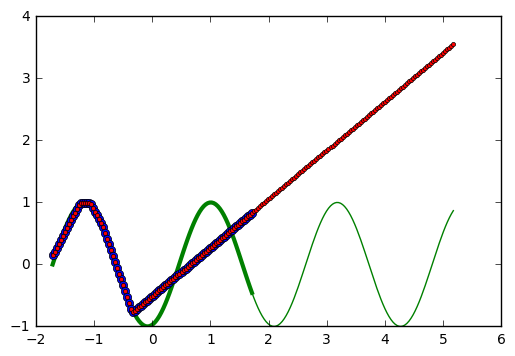

In [119]:
plt.plot(train_x,train_y,'g',linewidth=3)
plt.plot(test_x, test_y,'g', linewidth=1)

plt.plot(train_x,model_1.predict(train_x),'bo',ms=6)
plt.plot(test_x, model_1.predict(test_x),'ro', ms=3)

In [120]:
print model_1.get_layer("activation_fun1").get_weights()
print model_1.get_layer("activation_fun2").get_weights()

[array([[-1.01275861,  0.59674358, -0.12547106,  0.9299739 ,  2.05258632,
         0.77496487]], dtype=float32), array([-1.08544874,  0.73924321, -0.03694044,  0.79615992,  0.69555002,
        0.98057759], dtype=float32)]
[array([[-1.81769836],
       [-1.19109476],
       [ 0.20178875],
       [-1.05392802],
       [ 1.69343126],
       [-1.29087675]], dtype=float32), array([ 1.29300547], dtype=float32)]


In [121]:
#set the first dense layer to relu 6 for this to work

l1=[np.array([[-.9,-.8,-.8, .8, 1, .7]]),
     np.array([-.9,.2,.8,-.8,0,.8])]

model_1.get_layer("activation_fun1").set_weights(l1)

l2=[np.array([[ -6],[3 ],[0.4],[ -6],[ 2 ],[1]]), 
    np.array([-2])]

model_1.get_layer("activation_fun2").set_weights(l2)

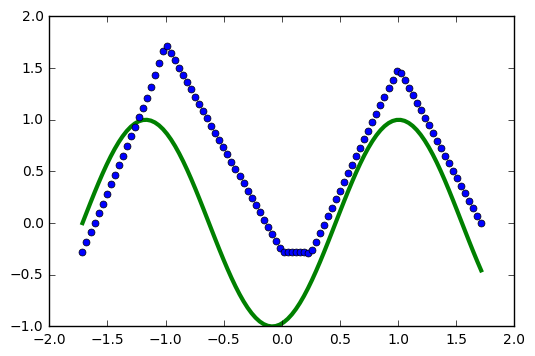

In [122]:
plt.plot(train_x,train_y,'g',linewidth=3)
plt.plot(train_x,model_1.predict(train_x),'bo',ms=5)
#plt.plot(test_x, model_1.predict(test_x),'ro', ms=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_22 (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
activation_fun1 (Dense)          (None, 6)             12          input_22[0][0]                   
____________________________________________________________________________________________________
activation_fun2 (Dense)          (None, 1)             7           activation_fun1[0][0]            
Total params: 19
____________________________________________________________________________________________________
('loss:', 0.0049354871734976768, 'mae:', 0.055665984749794006)
('test loss:', 10.625035875942558, 'test mae:', 2.0145244654268026)


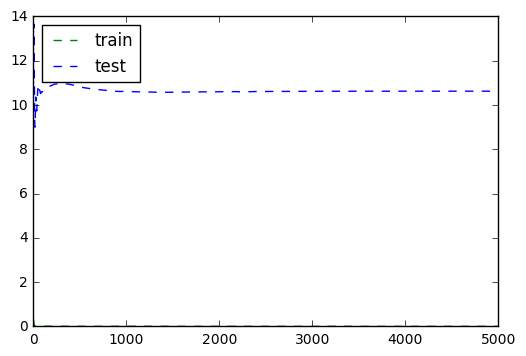

In [123]:
# Use the previous set weights as starting weights:

from keras.models import Model
from keras.layers import Input, Dense

input1 = Input(shape=(1,))
x = Dense(6, activation='relu', name='activation_fun1')(input1)   # change tanh to relu
predictions = Dense(1,activation='linear',name='activation_fun2')(x)

#model_1 = Model(input=input1, output=predictions) Keep this switched off

#model_1.compile(loss='mse', optimizer ='adam', metrics=['mae'])  Keep this switched off
model_1.summary()

model_1.fit(train_x,train_y,batch_size=100, nb_epoch=5000, verbose=0,validation_data=(test_x, test_y)) 

plt.plot(model_1.history.epoch, model_1.history.history['loss'], 'g--',
         model_1.history.epoch, model_1.history.history['val_loss'], 'b--',)
plt.legend(['train', 'test'], loc='upper left')

print ("loss:",model_1.history.history['loss'][-1],"mae:",model_1.history.history['mean_absolute_error'][-1])
print ("test loss:",model_1.history.history['val_loss'][-1],"test mae:",model_1.history.history['val_mean_absolute_error'][-1])

[]

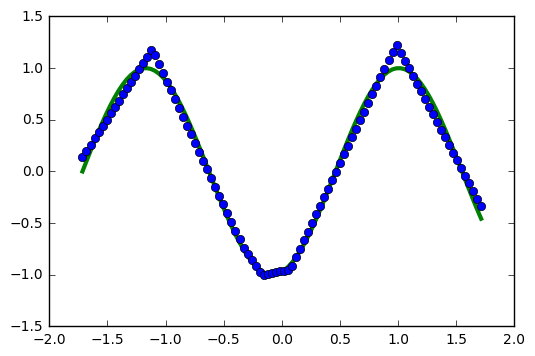

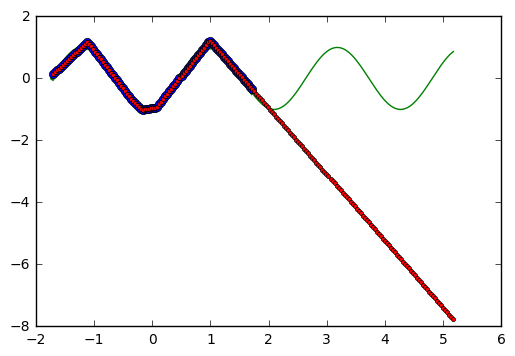

In [127]:
plt.figure(1)
plt.plot(train_x,train_y,'g',linewidth=3)
plt.plot(train_x,model_1.predict(train_x),'bo',ms=6)
plt.plot()

plt.figure(2)
plt.plot(train_x,train_y,'g',linewidth=3)
plt.plot(test_x, test_y,'g', linewidth=1)

plt.plot(train_x,model_1.predict(train_x),'bo',ms=6)
plt.plot(test_x, model_1.predict(test_x),'ro', ms=3)
plt.plot()


# Changing the X input

In [129]:
vfunc = np.vectorize(np.binary_repr)
vint = np.vectorize(int)


train_x=np.arange(0, 10, 0.1)
train_y=np.sin(train_x)

test_x=np.arange(0, 20, 0.1)
test_y=np.sin(test_x)

train_x_bin=vfunc(vint(10*train_x),8)
train_x_bin = np.array([list(train_x_bin[i]) for i in range(train_x_bin.shape[0])]).astype(int)


test_x_bin=vfunc(vint(10*test_x),8)
test_x_bin = np.array([list(test_x_bin[i]) for i in range(test_x_bin.shape[0])]).astype(int)

print train_x_bin[:10]


[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 1]]


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_24 (InputLayer)            (None, 8)             0                                            
____________________________________________________________________________________________________
activation_fun1 (Dense)          (None, 6)             54          input_24[0][0]                   
____________________________________________________________________________________________________
activation_fun2 (Dense)          (None, 1)             7           activation_fun1[0][0]            
Total params: 61
____________________________________________________________________________________________________
('loss:', 0.0014844442484900355, 'mae:', 0.030850401148200035)
('test loss:', 0.30155237892176956, 'test mae:', 0.31732925400137901)


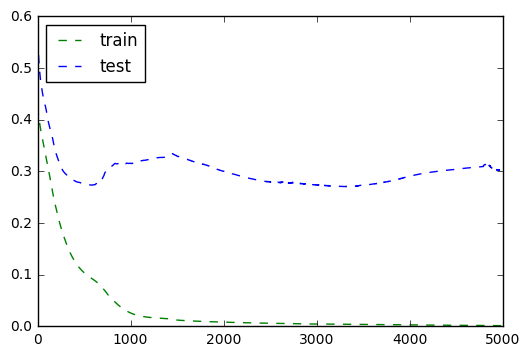

In [131]:
from keras.models import Model
from keras.layers import Input, Dense

input1 = Input(shape=(8,))
x = Dense(6, activation='relu', name='activation_fun1')(input1)   # change tanh to relu
predictions = Dense(1,activation='linear',name='activation_fun2')(x)

model_2 = Model(input=input1, output=predictions) 

model_2.compile(loss='mse', optimizer ='adam', metrics=['mae']) 
model_2.summary()

model_2.fit(train_x_bin,train_y,batch_size=100, nb_epoch=5000, verbose=0,validation_data=(test_x_bin, test_y)) 

plt.plot(model_2.history.epoch, model_2.history.history['loss'], 'g--',
         model_2.history.epoch, model_2.history.history['val_loss'], 'b--',)
plt.legend(['train', 'test'], loc='upper left')

print ("loss:",model_2.history.history['loss'][-1],"mae:",model_2.history.history['mean_absolute_error'][-1])
print ("test loss:",model_2.history.history['val_loss'][-1],"test mae:",model_2.history.history['val_mean_absolute_error'][-1])

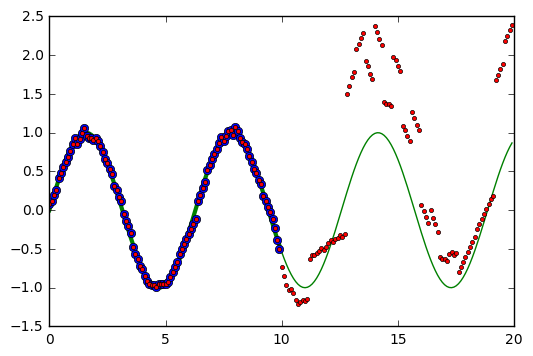

In [133]:
plt.plot(train_x,train_y,'g',linewidth=3)
plt.plot(test_x, test_y,'g', linewidth=1)

plt.plot(train_x,model_2.predict(train_x_bin),'bo',ms=6)
plt.plot(test_x, model_2.predict(test_x_bin),'ro', ms=3)